In [ ]:
#load the macro
%store -r __common_lib

In [2]:
__common_lib

The libraries have been loaded!


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. Basic data exploration

### 1.1 general stats

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.2 Feature Grouping, missing ID, and encoding

#### a. Numerical Categorical or Binnable

In [6]:
num_cat = ['MSSubClass','MoSold','YrSold']

In [7]:
def Count_NA(feat_ls):
    """
    show the NA features
    """
    train_df = train[feat_ls].isna().sum()[train[feat_ls].isna().sum()>0]
    train_df.rename('Train',inplace=True)
    test_df = test[feat_ls].isna().sum()[test[feat_ls].isna().sum()>0]
    test_df.rename('Test',inplace=True)
    NA_df = pd.concat([train_df, test_df],axis=1)
    NA_df.fillna(0, inplace=True)
    return NA_df

In [8]:
# find which features have NAs and how many
Count_NA(num_cat)

,Train,Test


#### b. Numerical (Continuous and Ordinal)

In [9]:
num = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','OverallQual','OverallCond',
        'YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
        'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
        'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [10]:
num_NA = Count_NA(num)
num_NA

,Train,Test
LotFrontage,259.0,227
MasVnrArea,8.0,15
GarageYrBlt,81.0,78
BsmtFinSF1,0.0,1
BsmtFinSF2,0.0,1
BsmtUnfSF,0.0,1
TotalBsmtSF,0.0,1
BsmtFullBath,0.0,2
BsmtHalfBath,0.0,2
GarageCars,0.0,1


**explore the possibility of filling LotFrontage and GarageYrBlt with correlated features**

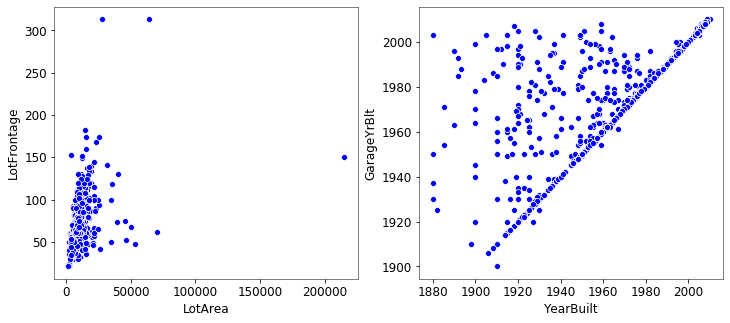

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))
sns.scatterplot(data=train,x='LotArea',y='LotFrontage',ax=axes[0])
sns.scatterplot(data=train,x='YearBuilt',y='GarageYrBlt',ax=axes[1])
plt.show()

In [12]:
sub = train[['GarageYrBlt','GarageCars']]
sub[sub['GarageYrBlt'].isna()].T

,39,48,78,88,89,99,108,125,127,140,148,155,163,165,198,210,241,250,287,291,307,375,386,393,431,434,441,464,495,520,528,533,535,562,582,613,614,620,635,636,638,649,705,710,738,750,784,826,843,921,942,954,960,968,970,976,1009,1011,1030,1038,1096,1123,1131,1137,1143,1173,1179,1218,1219,1234,1257,1283,1323,1325,1326,1337,1349,1407,1449,1450,1453
GarageYrBlt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
sub = train[['MasVnrType','MasVnrArea']]
sub[sub['MasVnrArea'].isna()].T

,234,529,650,936,973,977,1243,1278
MasVnrType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note 1
- 3 options for LotFrontage: mean% of LotArea, zero, or mean; inclined to use zero
- fill MasVnrArea with 0 because NA means no Mas
- **Do not try to fill GarageYrBlt with HouseYrBlt, because NA means no Garage, use min as a placeholder**

In [14]:
test[test['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [15]:
# fill nan
num_fill0 = num_NA.index.tolist()
num_fill0.remove('GarageYrBlt')

train[num_fill0] = train[num_fill0].fillna(0)
test[num_fill0] = test[num_fill0].fillna(0)

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].min())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].min())

# check nan again
Count_NA(num)

,Train,Test


#### c. String Ordinal

In [16]:
ord_ex = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
          'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC',]
ord_GLQ = ['BsmtFinType1','BsmtFinType2']
ord_oth = ['BsmtExposure','Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence']
ords = ord_ex + ord_GLQ + ord_oth

In [17]:
# create ordinal mapping
ord_ex_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
ord_GLQ_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
BE_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
El_map = {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1, 'NA':0}
Fn_map = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'NA':0}
GT_map = {'2Types':6, 'Attchd':5, 'Basment':4, 'BuiltIn':3, 'CarPort':2, 'Detchd':1, 'NA':0}
GF_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
PD_map = {'Y':3, 'P':2, 'N':1, 'NA':0}
Fc_map = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
oth_MAP_ls = [BE_map, El_map, Fn_map, GT_map, GF_map, PD_map, Fc_map]

In [18]:
# count number of nan
Count_NA(ords)

,Train,Test
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
FireplaceQu,690.0,730.0
GarageQual,81.0,78.0
GarageCond,81.0,78.0
PoolQC,1453.0,1456.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
BsmtExposure,38.0,44.0
Electrical,1.0,0.0


In [19]:
# replace na with string NA
train[ords] = train[ords].fillna('NA')
test[ords] = test[ords].fillna('NA')
# encode ordinal features
train[ord_ex] = train[ord_ex].replace(ord_ex_map)
train[ord_GLQ] = train[ord_GLQ].replace(ord_GLQ_map)
test[ord_ex] = test[ord_ex].replace(ord_ex_map)
test[ord_GLQ] = test[ord_GLQ].replace(ord_GLQ_map)

for feat, MAP in zip(ord_oth, oth_MAP_ls):
    train[feat] = train[feat].replace(MAP)
    test[feat] = test[feat].replace(MAP)

#### d. Categorical

In [20]:
cat = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
      'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
      'MasVnrType','Foundation','Heating','CentralAir','MiscFeature','SaleType','SaleCondition']

In [21]:
cat_NA = Count_NA(cat)
cat_NA

,Train,Test
Alley,1369.0,1352
MasVnrType,8.0,16
MiscFeature,1406.0,1408
MSZoning,0.0,4
Utilities,0.0,2
Exterior1st,0.0,1
Exterior2nd,0.0,1
SaleType,0.0,1


Alley and MiscFeature should be dropped for linear models

In [22]:
for feat in cat_NA.index.tolist():
    print(feat, '\t', test[feat].unique())

Alley 	 [nan 'Pave' 'Grvl']
MasVnrType 	 ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
MiscFeature 	 [nan 'Gar2' 'Shed' 'Othr']
MSZoning 	 ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Utilities 	 ['AllPub' nan]
Exterior1st 	 ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
Exterior2nd 	 ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
SaleType 	 ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]


In [23]:
train[cat] = train[cat].fillna('None')
test[cat] = test[cat].fillna('None')

## 2 Univariate Analysis and outlier detection

### 2.1 histogram and scatter plot of numerical and ordinal features

In [24]:
# convert the SalePrice to Logarithmic
train['SalePrice'] = np.log(train['SalePrice'] - train['MiscVal'])
train.drop('MiscVal', axis=1, inplace=True)
num.remove('MiscVal')

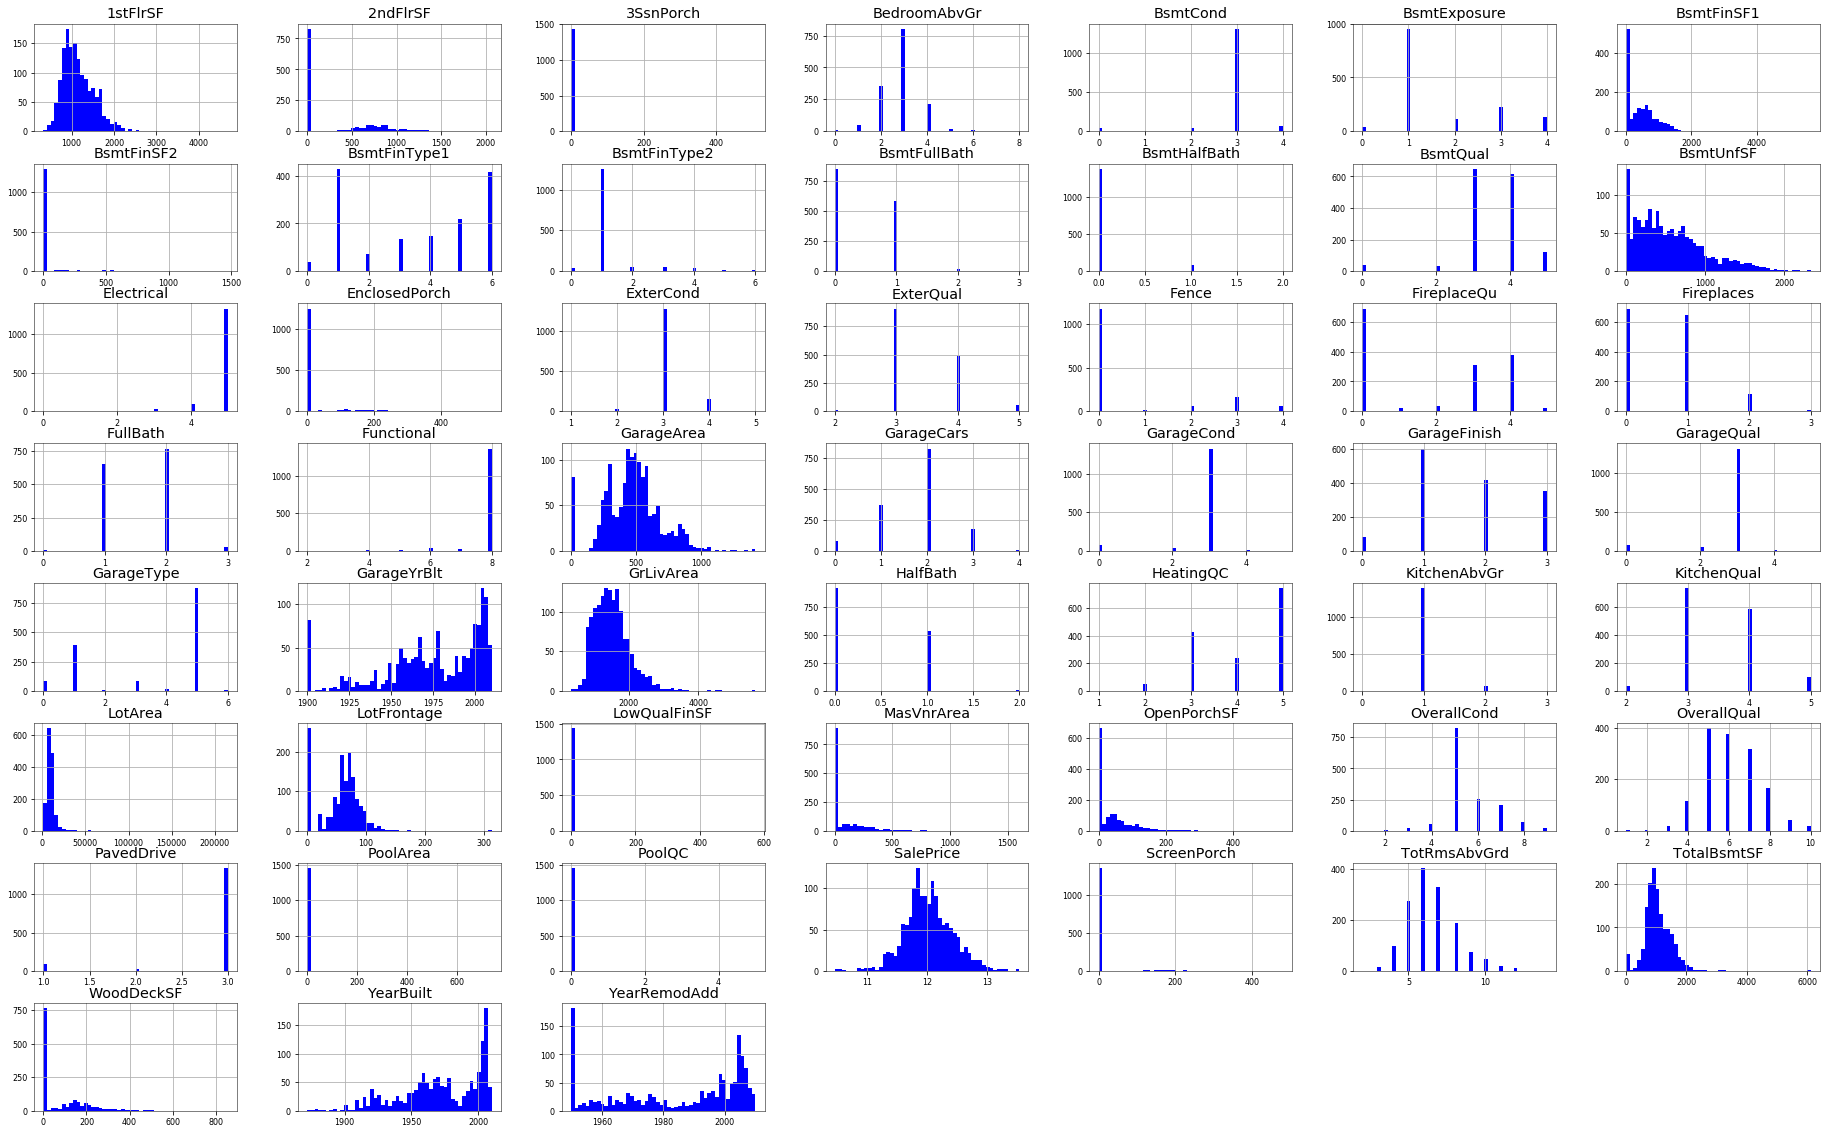

In [25]:
train[num+ords+['SalePrice']].hist(figsize=(32,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

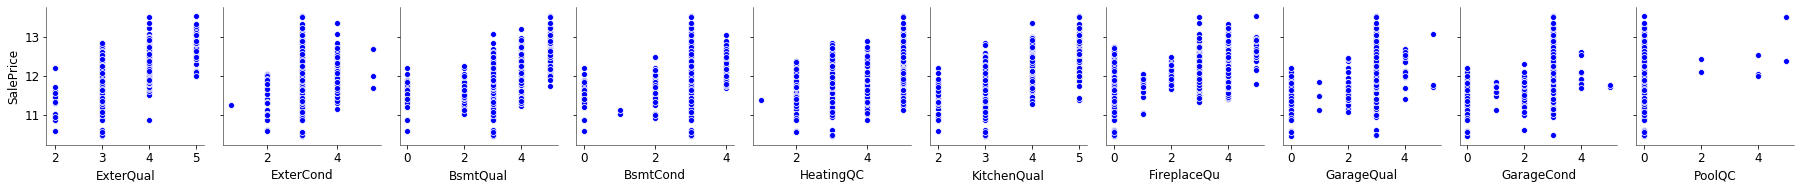

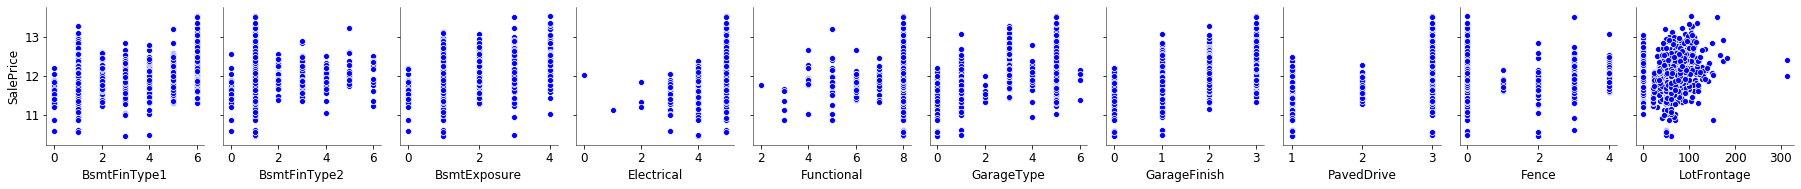

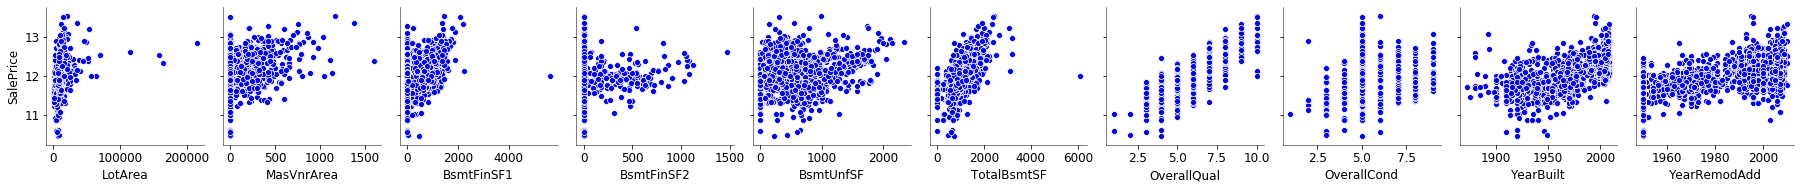

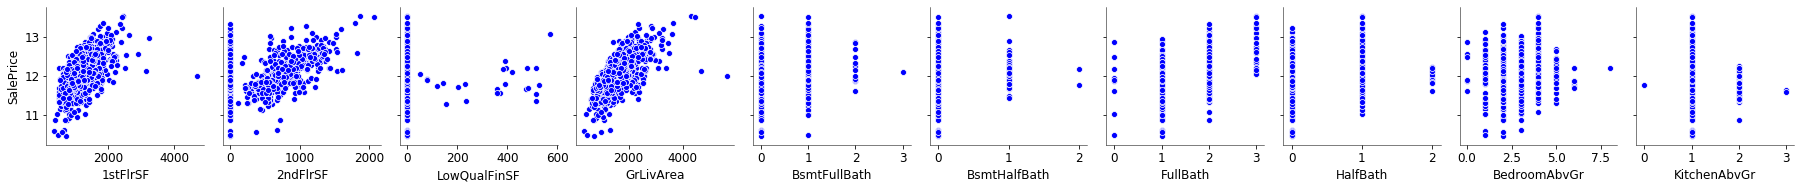

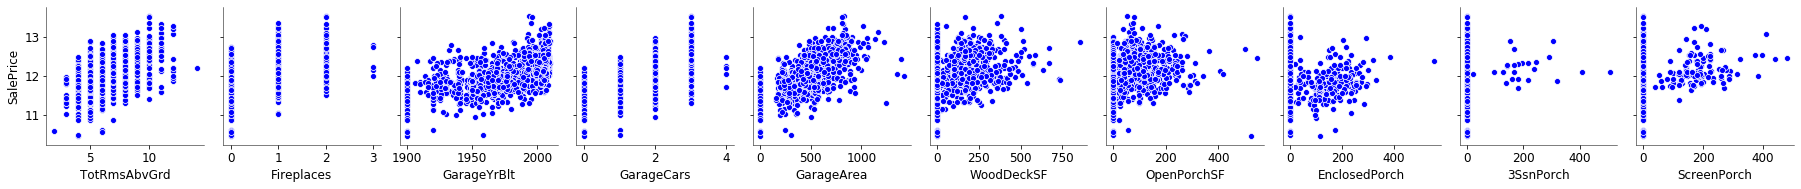

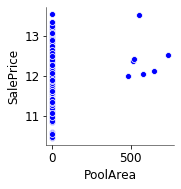

In [26]:
rc('figure', figsize=(5, 4))
for i in range(0, train[ords+num].shape[1], 10):
    sns.pairplot(data=train,
                x_vars=train[ords+num].columns[i:i+10],
                y_vars=['SalePrice'])

#### 2.2 Boxplot of categorical features

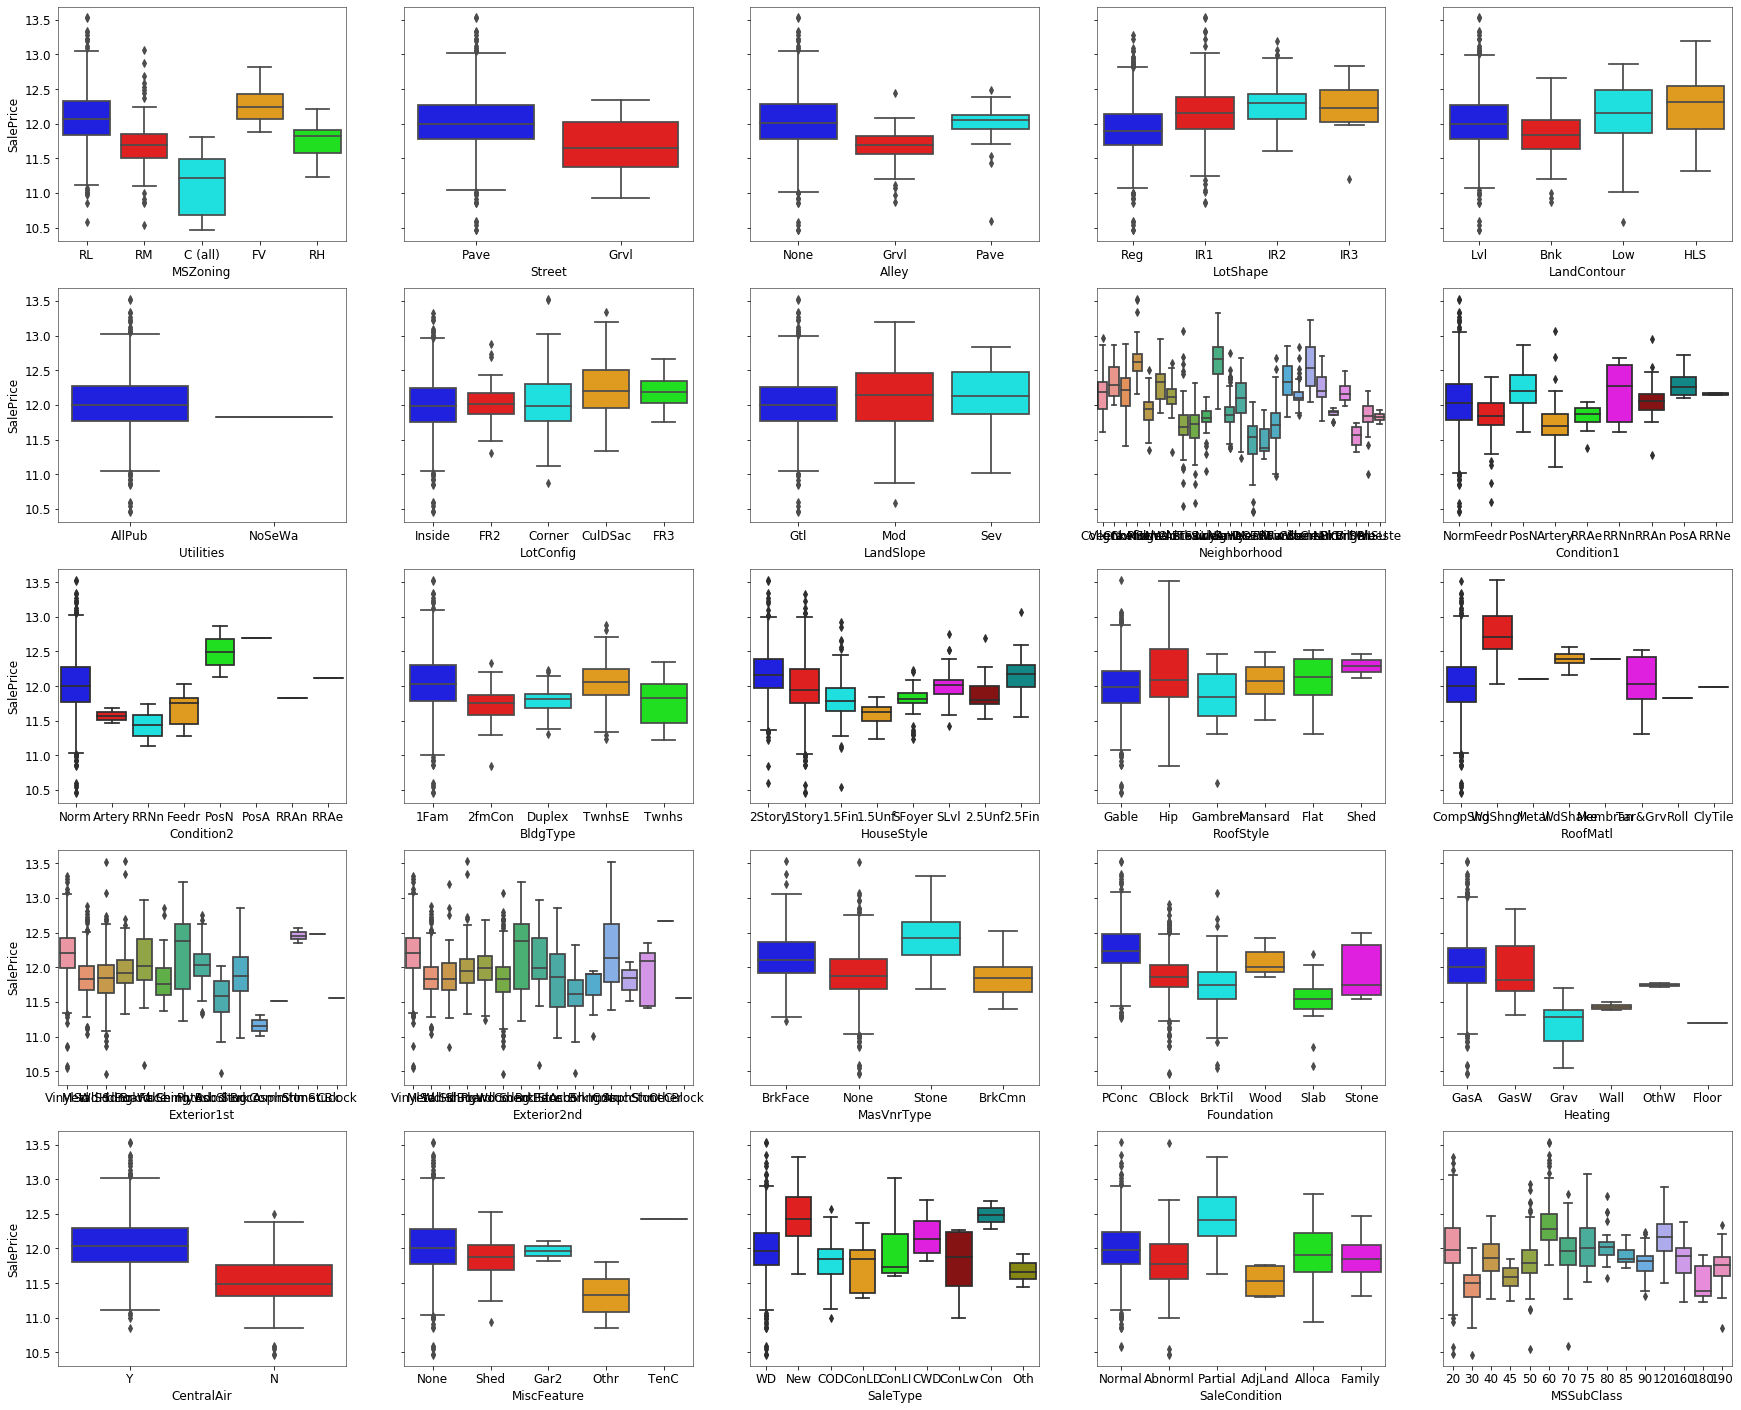

In [27]:
# n plots each row
cat_plus = cat+['MSSubClass']
cols = 5
rows = -(-len(cat_plus)//cols)

fig, ax = plt.subplots(rows, cols, sharey=True, figsize=(rows*6, cols*5))

for count, feat in enumerate(cat_plus):
    row = count // cols
    col = count % cols
    sns.boxplot(data=train[cat_plus + ['SalePrice']], x=feat, y='SalePrice', ax=ax[row,col])
    
    # display scale and label only on the left edge
    if col != 0:
        ax[row, col].set_ylabel('')


## 3. EDA

#### 3.1 correlation of Numerical and Ordinal features (c + d) against target

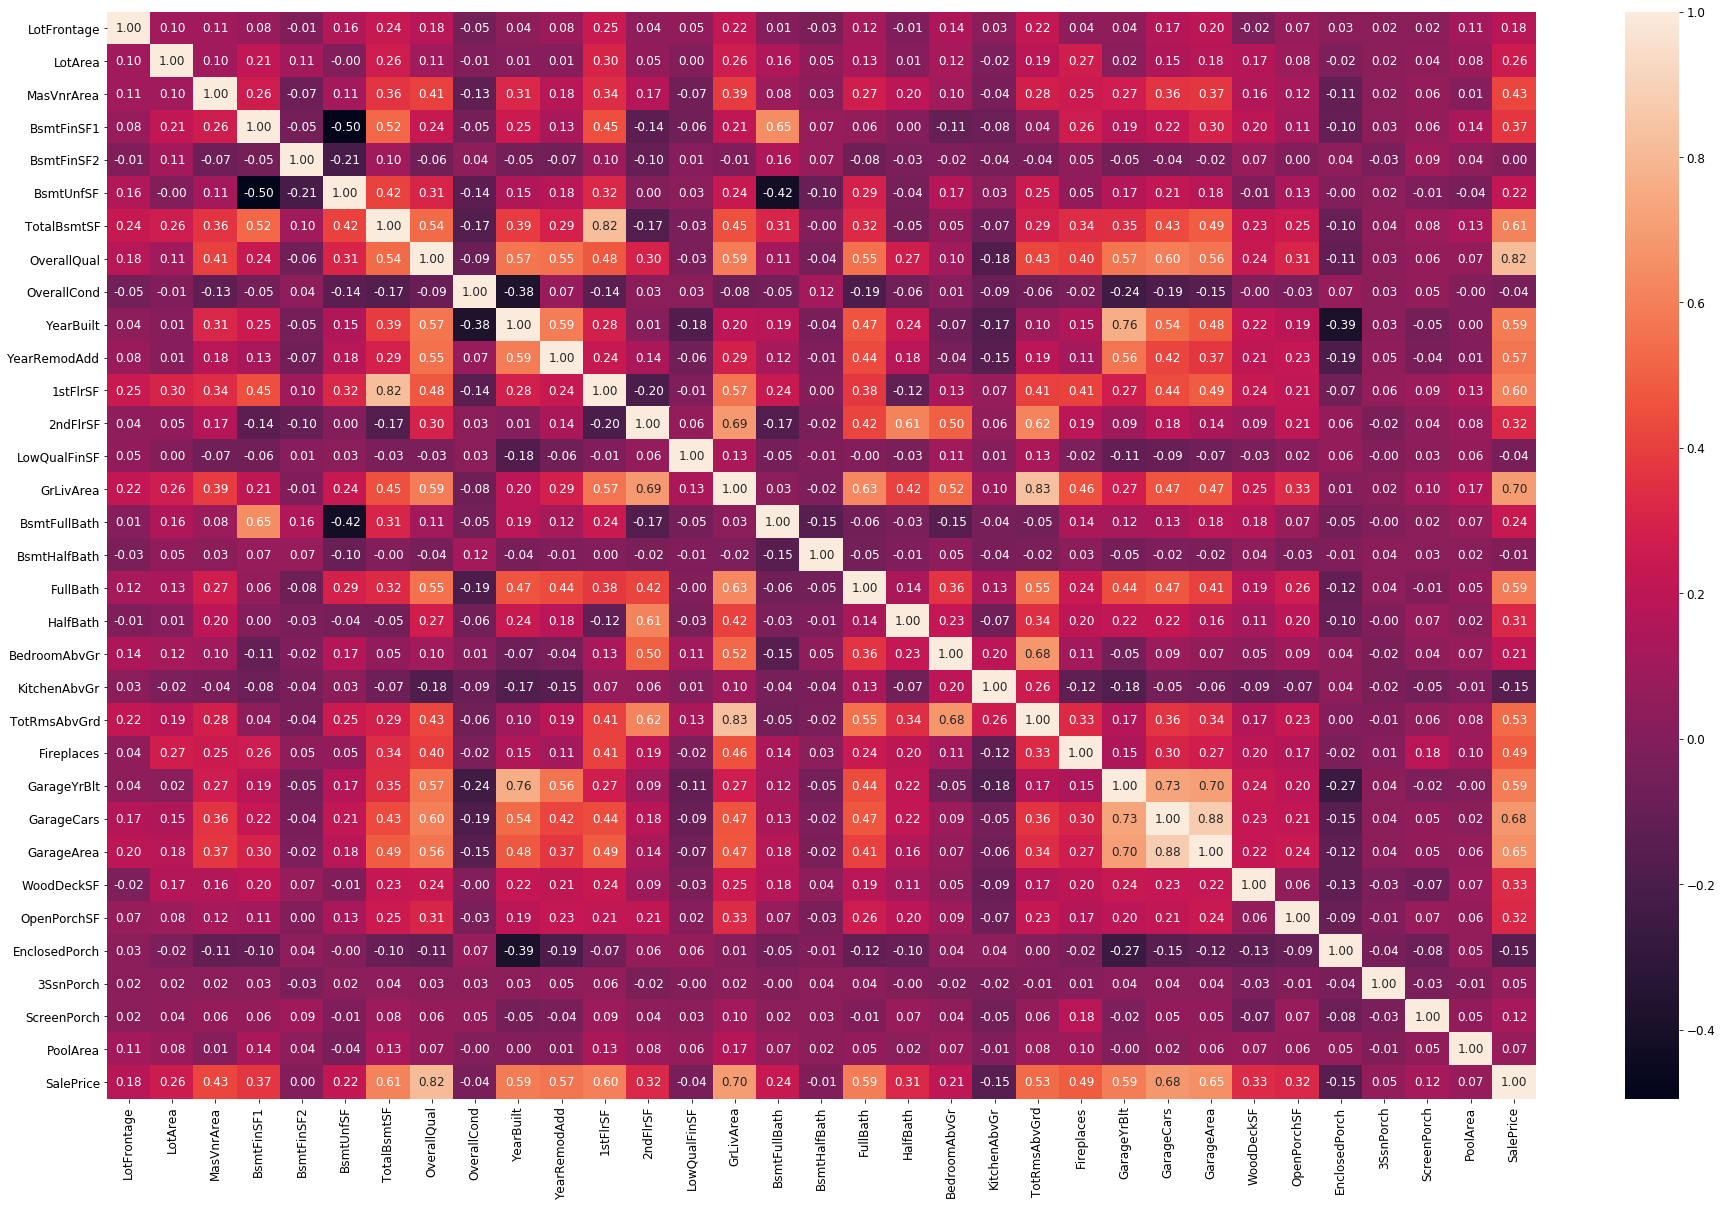

In [28]:
rc('figure', figsize=(32, 20))
sns.heatmap(train[num+['SalePrice']].corr(), annot=True, fmt='.2f')
plt.show()

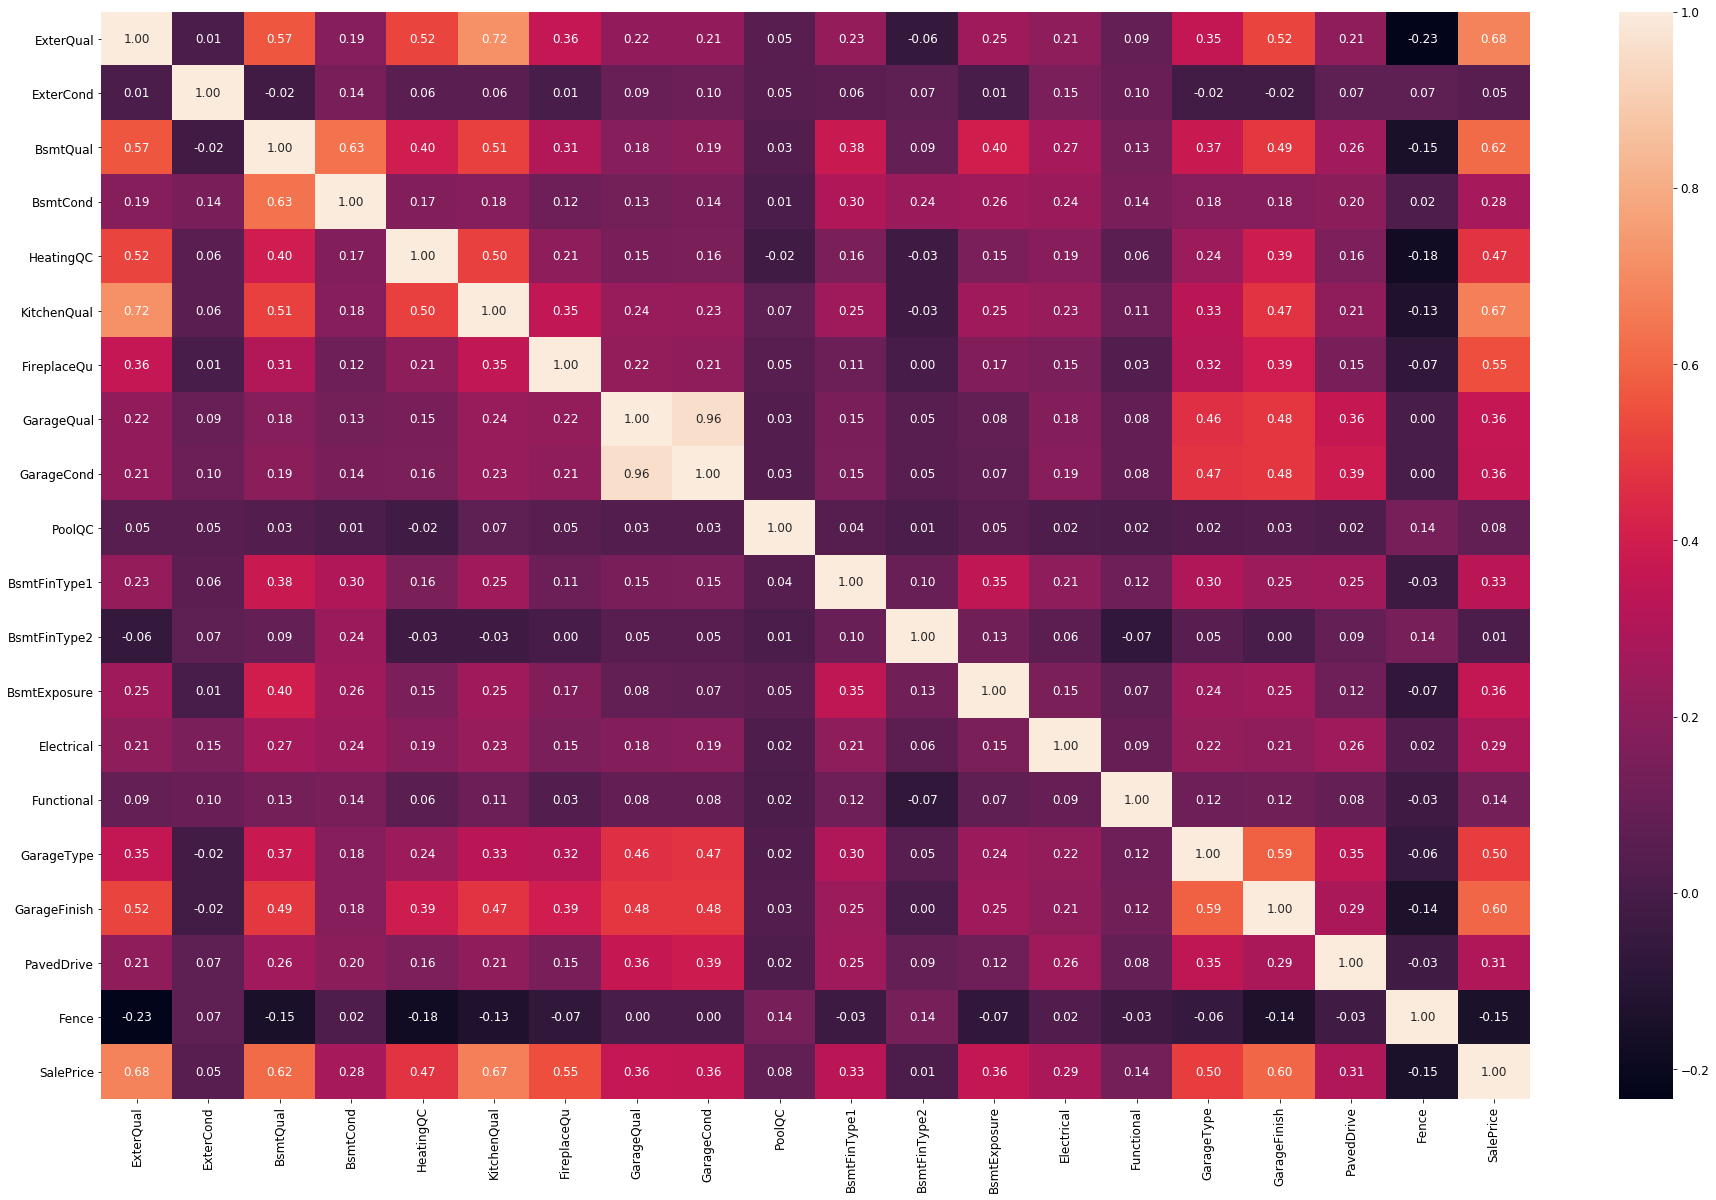

In [29]:
rc('figure', figsize=(32, 20))
sns.heatmap(train[ords+['SalePrice']].corr(), annot=True, fmt='.2f')
plt.show()

Note 2:
- Outlier: LotFrontage, Total BsmtSF, 1stFlrSF have outliers that could be dropped
- Low quality features: 2 Pool vars, all Basement2 vars, electrical, 
- Could bin the years, or convert to age, could combine YearBuilt and YearRemodeled to LastRefreshed
- MiscFeat and MiscVal could be removed from the model and act as an add-on 

#### 3.2 Simple EDA on Numerical Categorical (a)

plot year-month against average price

In [30]:
train['day'] = 1
train['month']=train['MoSold']
train['year']=train['YrSold']
train['YMSold'] = pd.to_datetime(train[['year','month','day']],errors = 'coerce')
train.drop(['day','month','year'],axis=1,inplace=True)

# new feature list
eng_feats = ['YMSold']

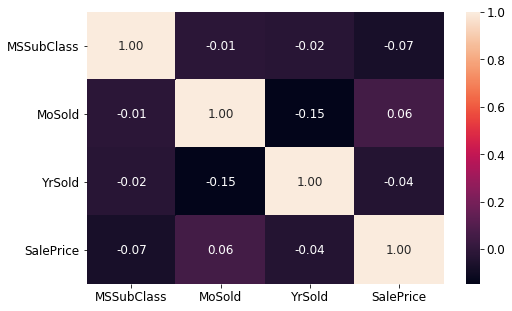

In [31]:
rc('figure', figsize=(8, 5))
sns.heatmap(train[num_cat+['YMSold','SalePrice']].corr(), annot=True, fmt='.2f')
plt.show()

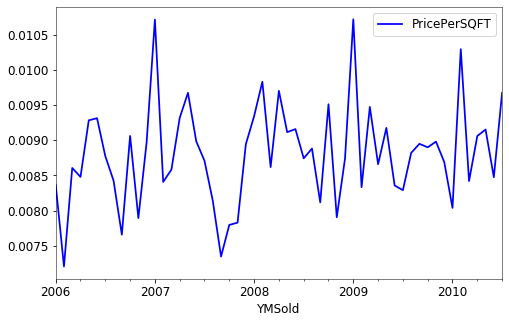

In [32]:
# plot price/sqft by month
train['PricePerSQFT']=train['SalePrice']/(train['1stFlrSF']+train['2ndFlrSF'])

df = train[['PricePerSQFT','YMSold']].groupby('YMSold').mean()
df.plot()

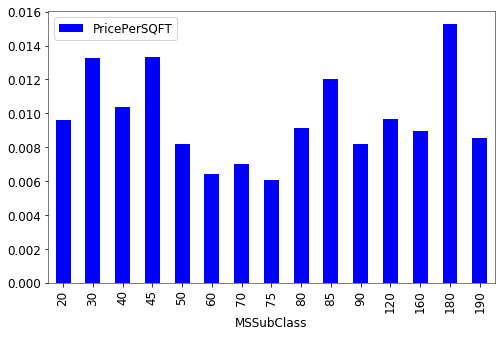

In [33]:
df = train[['PricePerSQFT','MSSubClass']].groupby('MSSubClass').mean()
df.plot(kind='bar')

Note 3:
- is mean-encoding worth trying?
- Feature combos based on different parts of the house is worthwhile

#### 3.3 OneHot the categorical features (use dummy for linear models)

In [34]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False,handle_unknown='ignore')
onehot.fit(train[cat_plus])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [35]:
train_1hot = onehot.transform(train[cat_plus])
test_1hot = onehot.transform(test[cat_plus])

In [36]:
drop_feat = ['Id','YMSold','PricePerSQFT']
X_train = train.drop(columns=cat_plus+drop_feat+['SalePrice'])
y_train = train['SalePrice']
X_test = test.drop(columns=cat_plus+['Id'])

In [37]:
X_train_final = np.hstack([X_train.values, train_1hot])
X_train_final.shape

(1460, 234)

## 4. Training without Extensive Feature Engineering

#### 4.1 Default Model setup

In [38]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=22)

import xgboost
xgb_reg = xgboost.XGBRegressor()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_lin_reg = Pipeline([('std',StandardScaler()),('lin_reg',LinearRegression())])

In [39]:
from sklearn.model_selection import cross_val_score
reg_scores = cross_val_score(lin_reg, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
print("Linear RMSE: ", -reg_scores.mean().round(4), "; Std: ", reg_scores.std().round(4))

std_reg_scores = cross_val_score(std_lin_reg, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
print("Std_Lin RMSE: ", -std_reg_scores.mean().round(4), "; Std: ", std_reg_scores.std().round(4))

xgb_scores = cross_val_score(xgb_reg, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
print("XGB RMSE: ",-xgb_scores.mean().round(4), "; Std: ", xgb_scores.std().round(4))

Linear RMSE:  0.169 ; Std:  0.0564
Std_Lin RMSE:  172906223332.3191 ; Std:  147689338092.201
XGB RMSE:  0.14 ; Std:  0.01


#### 4.2 Tune model hyper-parameters

In [40]:
from scipy.stats import reciprocal
param_dict = {'max_depth':[3,4,5,6,7,8],
              'subsample':reciprocal(0.5,1),
              'colsample_bytree':reciprocal(0.5,1),
              'eta':reciprocal(0.1,0.5),
              'min_child_weight':reciprocal(0.01,0.4)}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rnd_cv = RandomizedSearchCV(xgb_reg, param_dict, n_iter=500, n_jobs=-1, cv=kfold,random_state=22,
                           verbose=1, scoring='neg_root_mean_squared_error')

In [42]:
rnd_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  5.7min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=...
                                        'eta': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A70A4AB948>,
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': 

In [43]:
-rnd_cv.best_score_.round(4)

0.1262

tuning hyper-parameters alone improves score by 10%

## 5 Extensive Feature Engineering

#### 5.1 Establish baseline

In [44]:
reg_scores = cross_val_score(lin_reg, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("Linear RMSE: ", -reg_scores.mean().round(4), "; Std: ", reg_scores.std().round(4))

xgb_scores = cross_val_score(xgb_reg, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("XGB RMSE: ",-xgb_scores.mean().round(4), "; Std: ", xgb_scores.std().round(4))

Linear RMSE:  0.1508 ; Std:  0.0247
XGB RMSE:  0.1395 ; Std:  0.0081


slightly smaller errors

#### 5.2 Remove outliers: LotFrontage, Total BsmtSF, 1stFlrSF

In [45]:
# set the outlier threshold to be 80% of the max value of the feature
t = 0.8
outlier_ls = train[train['LotFrontage']>train['LotFrontage'].max()*t].Id.tolist() \
                + train[train['TotalBsmtSF']>train['TotalBsmtSF'].max()*t].Id.tolist() \
                + train[train['1stFlrSF']>train['1stFlrSF'].max()*t].Id.tolist()
list(set(outlier_ls))

[1299, 935]

In [46]:
outlier_idx = list(set(outlier_ls))
X_train_Noutlier_final = np.delete(X_train_final, outlier_idx, 0)
y_train_Noutlier = y_train.drop(index=outlier_idx)

In [47]:
reg_scores_Noutlier = cross_val_score(lin_reg, X_train_Noutlier_final, y_train_Noutlier, 
                             scoring='neg_root_mean_squared_error', cv=5)
print("Linear RMSE: ",-reg_scores_Noutlier.mean().round(4), "; Std: ", reg_scores_Noutlier.std().round(4))

xgb_scores_Noutlier = cross_val_score(xgb_reg, X_train_Noutlier_final, y_train_Noutlier, 
                             scoring='neg_root_mean_squared_error', cv=5)
print("XGB RMSE: ",-xgb_scores_Noutlier.mean().round(4), "; Std: ", xgb_scores_Noutlier.std().round(4))

Linear RMSE:  147.698 ; Std:  295.1137
XGB RMSE:  0.1394 ; Std:  0.0087


No obvious improvement from XGB model

#### 5.3 Construct Age var, group faetures

##### 5.3.1 drop Alley and MiscFeature, Mean Encoding all Categorical features

In [48]:
from sklearn.model_selection import KFold

def label_encode(df, col, label, n_splits=5, random_state=12, shuffle=True):
    df[col+'_me'] = 0
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=shuffle)
    for train_index, val_index in kf.split(df): # use cross-val index to reduce encoding results' correlation with target
        train, val = df.iloc[train_index], df.iloc[val_index]
        stats = val[col].map(train.groupby(col)[label].median())
        df.iloc[val_index, train.columns.get_loc(col+'_me')] = stats
        df[col+'_me'].fillna(train[label].median(), inplace=True)
    return df

In [49]:
# mean encoding for test set
# Create mean encoding for testing set using CV
from sklearn import base

class KFoldLabelEncoderTest(base.BaseEstimator, base.TransformerMixin):
    """
    input list, not col name strings
    """
    def __init__(self,train,orig_cols,enc_cols):
        
        self.train = train
        self.orig_cols = orig_cols
        self.enc_cols = enc_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(isinstance(self.orig_cols,list))
        assert(isinstance(self.enc_cols,list))
        enc_cols_lis = []
        for orig_col, enc_col in zip(self.orig_cols, self.enc_cols):
            stats =  self.train.groupby(orig_col)[enc_col].median()
            X[enc_col] = X[orig_col].map(stats)
        enc_cols_lis.append(X)
        return pd.concat(enc_cols_lis,axis=1)

In [50]:
# seperate categorical features and the rest
drop_feats_new = ['Id','YMSold','PricePerSQFT','Alley','MiscFeature']
cat_plus_short = cat_plus.copy()
cat_plus_short.remove('Alley')
cat_plus_short.remove('MiscFeature')

X_train_cat = train[cat_plus_short + ['SalePrice']].copy()
X_train_num = train.drop(columns=cat_plus+drop_feat+['SalePrice'])

In [51]:
# get the encoded features
for col in cat_plus_short:
    label_encode(X_train_cat, col, 'SalePrice')
# drop the original features and label
X_train_me = X_train_cat.drop(cat_plus_short + ['SalePrice'], axis=1)

In [52]:
X_train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition,MSSubClass,SalePrice,MSZoning_me,Street_me,LotShape_me,LandContour_me,Utilities_me,LotConfig_me,LandSlope_me,Neighborhood_me,Condition1_me,Condition2_me,BldgType_me,HouseStyle_me,RoofStyle_me,RoofMatl_me,Exterior1st_me,Exterior2nd_me,MasVnrType_me,Foundation_me,Heating_me,CentralAir_me,SaleType_me,SaleCondition_me,MSSubClass_me
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,WD,Normal,60,12.247694,12.053795,11.982929,11.884489,11.982929,11.982929,11.976659,11.982929,12.182804,12.007591,11.986669,12.013701,12.149502,11.976659,11.982929,12.206073,12.211060,12.100712,12.235510,11.995352,12.019743,11.960811,11.976659,12.297785
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,WD,Normal,20,12.109011,12.053795,11.982929,11.884489,11.982929,11.982929,11.925035,11.982929,12.458615,11.847967,11.986669,12.013701,11.944383,11.976659,11.982929,11.836092,11.827730,11.864462,11.849398,11.995352,12.019743,11.960811,11.976659,11.964001
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,WD,Normal,60,12.317167,12.066811,12.004568,12.141534,12.007622,12.004568,11.982929,11.992260,12.203315,12.021540,12.004568,12.031124,12.169148,11.982929,11.995352,12.206073,12.211801,12.130810,12.241680,12.010666,12.034691,11.975401,11.982929,12.299108
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,WD,Abnorml,70,11.849398,12.066811,11.998433,12.154779,11.995352,11.995352,12.013701,11.989160,12.287653,12.016122,11.999663,12.031124,12.154779,11.967181,11.989160,11.827006,11.798104,11.866395,11.735269,12.007622,12.031719,11.957611,11.782923,11.964001
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,WD,Normal,60,12.429216,12.076533,12.016726,12.154779,12.013701,12.016726,12.038817,12.013701,12.618182,12.043554,12.016726,12.046486,12.149502,12.007012,12.013701,12.206073,12.206073,12.122147,12.230277,12.028739,12.049419,11.989160,11.995352,12.273731


apply the same on testing set

In [53]:
# seperate categorical features and the rest
X_test_cat = test[cat_plus_short].copy()
drop_feats_test = ['Id','Alley','MiscFeature','MiscVal']
X_test_num = test.drop(columns=cat_plus+drop_feats_test)

In [54]:
# prepare the original and encoded column name lists
enc_cols = X_train_me.columns.tolist()
orig_cols = cat_plus_short
assert len(orig_cols)==len(enc_cols)

# mean encode testing set
ME_test = KFoldLabelEncoderTest(X_train_cat,orig_cols,enc_cols)
ME_test.transform(X_test_cat)
X_test_me = X_test_cat.drop(cat_plus_short, axis=1)

# verify if the column counts are equal between train and test
assert(X_train_me.shape[1]==X_test_me.shape[1] and X_train_num.shape[1]==X_test_num.shape[1])

In [55]:
# check the RMSE score
X_train_531 = pd.concat([X_train_me, X_train_num],axis=1)

xgb_scores_531 = cross_val_score(xgb_reg, X_train_531, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("XGB RMSE after target encoding: ",-xgb_scores_531.mean().round(4), "; Std: ", xgb_scores_531.std().round(4))

XGB RMSE after target encoding:  0.1386 ; Std:  0.009


Note 4: <br>
target encoding showed very limited improvement

##### 5.3.2 Create Exterial, Basement, Garage, Bathroom, Age and Season when sold

In [56]:
def group_num_features(dataset):
    df = dataset.copy()

    # Age
    df['Age'] = df['YrSold'] - df[['YearBuilt','YearRemodAdd']].max(1)

    # Basement Score
    Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
    df['BsmtScore'] =  (df['BsmtFinSF1'] * (df['BsmtFinType1']/10 + 1) \
                                     + df['BsmtFinSF2'] * (df['BsmtFinType2']/10 + 1) \
                                     + df['BsmtUnfSF'] * 0.5) \
                                   * (df['BsmtQual']/10 + 1) \
                                   * (df['BsmtCond']/10 + 1) \
                                   * (df['BsmtExposure']/10 + 1)    


    # Garage Score
    Garage = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
    Sqf_per_Car = df['GarageArea'].sum() / df['GarageCars'].sum()
    df['GarageScore'] = df['GarageArea'] \
                                   * df['GarageArea'] / df['GarageCars'] / Sqf_per_Car \
                                   * (df['GarageFinish']/10 + 1) \
                                   * (df['GarageQual']/10 + 1) \
                                   * (df['GarageCond']/10 + 1) \
                                   / (df['YrSold'] - df['GarageYrBlt'])//10/100 + 1 # Age Penalty      

    # bathrooms:
    df['Bath'] = df['FullBath'] + df['HalfBath']*0.5
    df['BsmtBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5
    df['Warm'] = df['MoSold'].isin([5,6,7,8,9,10])*1

    return df.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','MoSold']+Bsmt+Garage, axis=1)

In [57]:
X_train_FG = group_num_features(X_train_num)
X_test_FG  = group_num_features(X_test_num)

In [58]:
# see the RMSE score
X_train_532 = pd.concat([X_train_me, X_train_FG],axis=1)

xgb_scores_532 = cross_val_score(xgb_reg, X_train_532, y_train, scoring='neg_root_mean_squared_error', cv=5)
print("XGB RMSE after target encoding: ",-xgb_scores_532.mean().round(), "; Std: ", xgb_scores_532.std().round())

XGB RMSE after target encoding:  0.0 ; Std:  0.0


#### Note 5. Group features together helps reduce score std-dev

#### 5.4 Tune the model with Engineered Features

In [59]:
rnd_cv.fit(X_train_532, y_train)
-rnd_cv.best_score_.round(4)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.0min finished


0.1241

In [60]:
# apply the model on testing set
X_test_FE = pd.concat([X_test_me, X_test_FG],axis=1)

y_test_pred = np.exp(rnd_cv.predict(X_test_FE)) + test['MiscVal']

In [62]:
output = pd.DataFrame(y_test_pred.round(2))
output.set_index(test['Id'], inplace=True)
output.rename(columns={'MiscVal':'SalePrice'},inplace=True)
output.head()

,SalePrice
Id,
1461,131149.09
1462,173984.22
1463,183220.11
1464,186180.31
1465,197108.80


In [63]:
output.to_csv('submission_2.csv')